In [65]:
## Basics
import pandas as pd
import pickle

## Sklearn
from sklearn import cluster

## NLTK
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer

## Gensim
from gensim.models.doc2vec import Doc2Vec

## Plot
import matplotlib.pyplot as plt

In [4]:
with open('data/test_headlines.pkl', 'rb') as f:
    headlines = pickle.load(f)

### Cleaning the test data

In [6]:
def clean_headlines(tokens):
    '''
    Remove stopwords;
    Remove punctuation
    '''
    stop_words = stopwords.words('english')
    res = [w.lower() for w in tokens if not w in stop_words] ## Remove stopwords
    res_punc = [w for w in res if w.isalpha()] ## Remove punctuation
    return res_punc

In [12]:
tokens = [word_tokenize(x) for x in headlines]
clean_tokens = [clean_headlines(t) for t in tokens]
#test_headlines = [TreebankWordDetokenizer().detokenize(x) for x in clean_tokens]

In [15]:
''' Load model '''
model = Doc2Vec.load('models/doc2vec_model.model')

In [20]:
''' Infer test headlines vectors '''
docs, vecs = [], []
for doc in clean_tokens:
    docs.append(TreebankWordDetokenizer().detokenize(doc))
    vecs.append(model.infer_vector(doc, steps=20, alpha=0.025))
np.savetxt('data/words.txt', docs, fmt='%s')
np.save('data/vectors.npy', vecs)

In [49]:
df_d2v = pd.DataFrame({'headline': docs, 'vector': vecs})

### KMeans

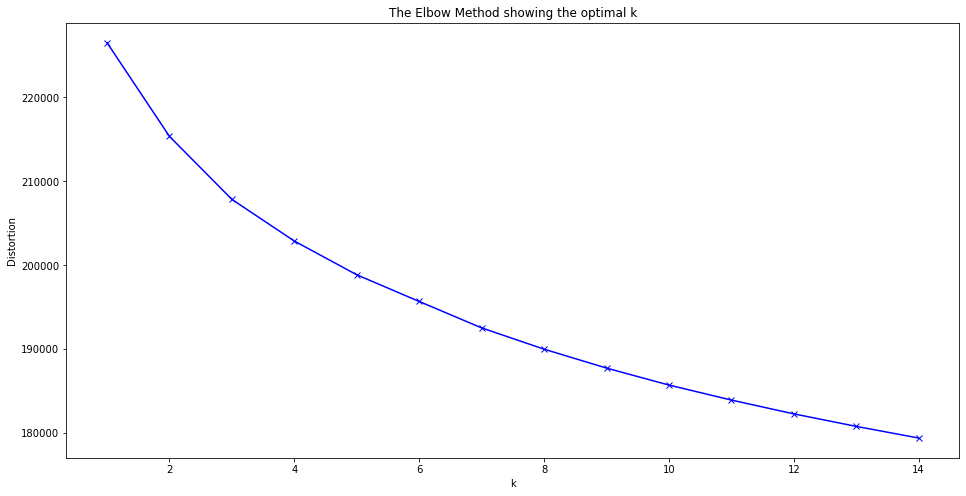

In [67]:
''' PAREI AQUI '''
distortions = []
K = range(1,10)
X = df_d2v.vector.to_list() ## Modelo treina com os vetores
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [68]:
''' Usando o kmeans do sklearn '''
X = df_d2v.vector.to_list() ## Modelo treina com os vetores
N_CLUSTERS = 3

kmeans = cluster.KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(X)

labels = kmeans.labels_ ## Lista de grupos
centroids = kmeans.cluster_centers_
df_kmeans = pd.DataFrame({"headline" : df_d2v.headline.to_list(), "cluster": labels})

In [71]:
df_kmeans[df_kmeans['cluster']==2]

,headline,cluster
0,watch how a drug addict gets through the day,2
1,ben carson is the smartest guy in the room and...,2
7,overdoing it,2
9,getting your master degree motherhood,2
10,the most underrated cities in the,2
...,...,...
13391,world most hotel suites photos,2
13392,best venice nobody home portrait family edge,2
13393,ode to parents performed by the sydney philhar...,2
13395,where the best place to take your kids surfing...,2


In [59]:
test = model.infer_vector(['obama', 'president'], steps=20, alpha=0.025)

In [73]:
model.docvecs.most_similar([test], topn=5)

[('27399', 0.9092106223106384),
 ('29162', 0.856951117515564),
 ('21745', 0.8566271662712097),
 ('14292', 0.8492120504379272),
 ('26042', 0.8345592021942139)]

In [63]:
model.docvecs[0]

array([ 2.46328   ,  1.4597328 ,  3.6478312 , -3.5024216 , -1.18646   ,
        0.6239186 ,  1.6730669 ,  0.2782273 , -0.31181517, -1.4878837 ,
       -0.954315  ,  0.86592185,  1.8387349 ,  3.7001135 ,  0.43713778,
       -0.5728336 , -1.7233899 ,  2.3969023 , -1.4264424 ,  3.2611306 ],
      dtype=float32)